In [1]:
library(Seurat)
library(dplyr)
library(ggplot2)
library(patchwork)
library(tibble)
library(qs)
library(ggplot2)
library(ggridges)
library(tidyr)
library(RColorBrewer)
library(readxl)
library(stringr)
library(ggpubr) 
library(viridis)
library(reshape)
library(forestploter)
library(grid)

seed <- 123
set.seed(seed)
options(dplyr.summarise.inform = FALSE)
setwd("~/integration_project/step_14/11march_final/")

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


qs 0.25.6

Loading required package: viridisLite


Attaching package: ‘reshape’


The following objects are masked from ‘package:tidyr’:

    expand, smiths


The following object is masked from ‘package:dplyr’:

    rename




In [2]:
exl_file <- read_excel("/home/a.garg/integration_project/step_14/11march_final/all_pval_data.xlsx", sheet = "Sheet2", .name_repair = "minimal")
head(exl_file)

Cell_state,Ab-Level 0,Ab-Others,Ab-pval,Samples,Reference
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Homeostatic,0.1276596,0.1698859,0.48000,AD-1,All
Activated,0.3708207,0.3584703,1.00000,AD-1,All
Homeostatic,0.1800000,0.2472328,0.59000,AD-2,All
Activated,0.3400000,0.2536461,1.00000,AD-2,All
Homeostatic,0.1770833,0.2676247,0.03030,AD-3,All
Activated,0.3489583,0.2323535,0.00117,AD-3,All


In [3]:
data <- exl_file[exl_file$Cell_state == "Homeostatic",]
data$`Ab-pval` <- format(data$`Ab-pval`, digits = 3, scientific = TRUE)
data_long <- gather(data, key = "Layers", value = "Layer_val", `Ab-Level 0`,`Ab-Others`)
data_long <- data_long[data_long$Layers == "Ab-Level 0",]
head(data_long)

Cell_state,Ab-pval,Samples,Reference,Layers,Layer_val
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
Homeostatic,4.80e-01,AD-1,All,Ab-Level 0,0.12765957
Homeostatic,5.90e-01,AD-2,All,Ab-Level 0,0.18000000
Homeostatic,3.03e-02,AD-3,All,Ab-Level 0,0.17708333
Homeostatic,4.56e-02,AD-1,Xenografted-mic,Ab-Level 0,0.02431611
Homeostatic,1.45e-01,AD-2,Xenografted-mic,Ab-Level 0,0.02800000
Homeostatic,9.22e-02,AD-3,Xenografted-mic,Ab-Level 0,0.04687500


In [4]:
# for all refrence togetther
box_func <- function(x){
  iqr <- IQR(x)
  q3 <- quantile(x, probs = c(0.25, 0.5, 0.75), names = FALSE)
  c("Homeo_Level0_min" = q3[1] - 1.5*iqr, "Homeo_Level0_q1" = q3[1], "Homeo_Level0_med" = q3[2],
    "Homeo_Level0_q3" = q3[3], "Homeo_Level0_max" = q3[3] + 1.5*iqr)
}

val <- split(data_long$Layer_val, list(data_long$Samples))
val <- lapply(val, box_func)
dat <- do.call(rbind, val)
dat <- data.frame(Samples = row.names(dat),
                  dat, row.names = NULL)


box_func <- function(x){
  iqr <- IQR(x)
  q3 <- quantile(x, probs = c(0.25, 0.5, 0.75), names = FALSE)
  c("Homeo_pval_min" = q3[1] - 1.5*iqr, "Homeo_pval_q1" = q3[1], "Homeo_pval_med" = q3[2],
    "Homeo_pval_q3" = q3[3], "Homeo_pval_max" = q3[3] + 1.5*iqr)
}

p_val <- split(as.numeric(data_long$`Ab-pval`), list(data_long$Samples))
p_val <- lapply(p_val, box_func)
p_dat <- do.call(rbind, p_val)
p_dat <- data.frame(Samples = row.names(p_dat),
                  p_dat, row.names = NULL)
p_dat$Homeostatic <- paste(rep(" ", 20), collapse = " ")

hom_dat1 <- dat %>%
left_join(p_dat, by = "Samples") %>%
select(-c(Homeo_pval_min,Homeo_pval_q1,Homeo_pval_q3,Homeo_pval_max))%>%
mutate(Homeo_Level0_pval = Homeo_pval_med)%>%
select(-c(Homeo_pval_med))

hom_dat1

Samples,Homeo_Level0_min,Homeo_Level0_q1,Homeo_Level0_med,Homeo_Level0_q3,Homeo_Level0_max,Homeostatic,Homeo_Level0_pval
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
AD-1,0.007598784,0.03951368,0.05167173,0.06079027,0.09270517,,0.1340
AD-2,-0.108000000,0.03600000,0.11600000,0.13200000,0.27600000,,0.5900
AD-3,-0.039062500,0.04687500,0.09375000,0.10416667,0.19010417,,0.0303


In [5]:
data <- exl_file[exl_file$Cell_state == "Homeostatic",]

data$`Ab-pval` <- format(data$`Ab-pval`, digits = 3, scientific = TRUE)
data_long <- gather(data, key = "Layers", value = "Layer_val", `Ab-Level 0`,`Ab-Others`)

data_long <- data_long[data_long$Layers != "Ab-Level 0",]
head(data_long)

Cell_state,Ab-pval,Samples,Reference,Layers,Layer_val
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
Homeostatic,4.80e-01,AD-1,All,Ab-Others,0.16988586
Homeostatic,5.90e-01,AD-2,All,Ab-Others,0.24723277
Homeostatic,3.03e-02,AD-3,All,Ab-Others,0.26762471
Homeostatic,4.56e-02,AD-1,Xenografted-mic,Ab-Others,0.10682968
Homeostatic,1.45e-01,AD-2,Xenografted-mic,Ab-Others,0.06005284
Homeostatic,9.22e-02,AD-3,Xenografted-mic,Ab-Others,0.09545816


In [6]:
# for all refrence togetther
box_func <- function(x){
  iqr <- IQR(x)
  q3 <- quantile(x, probs = c(0.25, 0.5, 0.75), names = FALSE)
  c("Homeo_Other_min" = q3[1] - 1.5*iqr, "Homeo_Other_q1" = q3[1], "Homeo_Other_med" = q3[2],
    "Homeo_Other_q3" = q3[3], "Homeo_Other_max" = q3[3] + 1.5*iqr)
}

val <- split(data_long$Layer_val, list(data_long$Samples))
val <- lapply(val, box_func)
dat <- do.call(rbind, val)
dat <- data.frame(Samples = row.names(dat),
                  dat, row.names = NULL)

box_func <- function(x){
  iqr <- IQR(x)
  q3 <- quantile(x, probs = c(0.25, 0.5, 0.75), names = FALSE)
  c("Homeo_pval_min" = q3[1] - 1.5*iqr, "Homeo_pval_q1" = q3[1], "Homeo_pval_med" = q3[2],
    "Homeo_pval_q3" = q3[3], "Homeo_pval_max" = q3[3] + 1.5*iqr)
}

p_val <- split(as.numeric(data_long$`Ab-pval`), list(data_long$Samples))
p_val <- lapply(p_val, box_func)
p_dat <- do.call(rbind, p_val)
p_dat <- data.frame(Samples = row.names(p_dat),
                  p_dat, row.names = NULL)

hom_dat2 <- dat %>%
left_join(p_dat, by = "Samples") %>%
select(-c(Homeo_pval_min,Homeo_pval_q1,Homeo_pval_q3,Homeo_pval_max))%>%
mutate(Homeo_Other_pval = Homeo_pval_med)%>%
select(-c(Homeo_pval_med))

hom_dat2

Samples,Homeo_Other_min,Homeo_Other_q1,Homeo_Other_med,Homeo_Other_q3,Homeo_Other_max,Homeo_Other_pval
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AD-1,0.07808462,0.11019791,0.1164241,0.1316068,0.1637201,0.1340
AD-2,-0.22071707,0.06005284,0.1500449,0.2472328,0.5280027,0.5900
AD-3,-0.04314302,0.09545816,0.1513505,0.1878590,0.3264601,0.0303


Activated  Ab level 0

In [7]:
data <- exl_file[exl_file$Cell_state != "Homeostatic",]
data$`Ab-pval` <- format(data$`Ab-pval`, digits = 3, scientific = TRUE)
data_long <- gather(data, key = "Layers", value = "Layer_val", `Ab-Level 0`,`Ab-Others`)
data_long <- data_long[data_long$Layers == "Ab-Level 0",]
head(data_long)

Cell_state,Ab-pval,Samples,Reference,Layers,Layer_val
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
Activated,1.00e+00,AD-1,All,Ab-Level 0,0.3708207
Activated,1.00e+00,AD-2,All,Ab-Level 0,0.3400000
Activated,1.17e-03,AD-3,All,Ab-Level 0,0.3489583
Activated,6.13e-02,AD-1,Xenografted-mic,Ab-Level 0,0.4133739
Activated,5.25e-02,AD-2,Xenografted-mic,Ab-Level 0,0.4200000
Activated,4.35e-02,AD-3,Xenografted-mic,Ab-Level 0,0.4427083


In [8]:
# for all refrence togetther
box_func <- function(x){
  iqr <- IQR(x)
  q3 <- quantile(x, probs = c(0.25, 0.5, 0.75), names = FALSE)
  c("Act_Level0_min" = q3[1] - 1.5*iqr, "Act_Level0_q1" = q3[1], "Act_Level0_med" = q3[2],
    "Act_Level0_q3" = q3[3], "Act_Level0_max" = q3[3] + 1.5*iqr)
}

val <- split(data_long$Layer_val, list(data_long$Samples))
val <- lapply(val, box_func)
dat <- do.call(rbind, val)
dat <- data.frame(Samples = row.names(dat),
                  dat, row.names = NULL)


box_func <- function(x){
  iqr <- IQR(x)
  q3 <- quantile(x, probs = c(0.25, 0.5, 0.75), names = FALSE)
  c("Act_pval_min" = q3[1] - 1.5*iqr, "Act_pval_q1" = q3[1], "Act_pval_med" = q3[2],
    "Act_pval_q3" = q3[3], "Act_pval_max" = q3[3] + 1.5*iqr)
}

p_val <- split(as.numeric(data_long$`Ab-pval`), list(data_long$Samples))
p_val <- lapply(p_val, box_func)
p_dat <- do.call(rbind, p_val)
p_dat <- data.frame(Samples = row.names(p_dat),
                  p_dat, row.names = NULL)
p_dat$Activated <- paste(rep(" ", 20), collapse = " ")

act_dat1 <- dat %>%
left_join(p_dat, by = "Samples") %>%
select(-c(Act_pval_min,Act_pval_q1,Act_pval_q3,Act_pval_max))%>%
mutate(Act_Level0_pval = Act_pval_med)%>%
select(-c(Act_pval_med))

act_dat1

Samples,Act_Level0_min,Act_Level0_q1,Act_Level0_med,Act_Level0_q3,Act_Level0_max,Activated,Act_Level0_pval
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
AD-1,0.2021277,0.3708207,0.4133739,0.4832827,0.6519757,,0.3270
AD-2,0.2200000,0.3400000,0.3680000,0.4200000,0.5400000,,0.8730
AD-3,0.2552083,0.3489583,0.3958333,0.4114583,0.5052083,,0.0142


Ab-other

In [9]:
data <- exl_file[exl_file$Cell_state != "Homeostatic",]

data$`Ab-pval` <- format(data$`Ab-pval`, digits = 3, scientific = TRUE)
data_long <- gather(data, key = "Layers", value = "Layer_val", `Ab-Level 0`,`Ab-Others`)

data_long <- data_long[data_long$Layers != "Ab-Level 0",]
head(data_long)

Cell_state,Ab-pval,Samples,Reference,Layers,Layer_val
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
Activated,1.00e+00,AD-1,All,Ab-Others,0.3584703
Activated,1.00e+00,AD-2,All,Ab-Others,0.2536461
Activated,1.17e-03,AD-3,All,Ab-Others,0.2323535
Activated,6.13e-02,AD-1,Xenografted-mic,Ab-Others,0.2593072
Activated,5.25e-02,AD-2,Xenografted-mic,Ab-Others,0.3113972
Activated,4.35e-02,AD-3,Xenografted-mic,Ab-Others,0.3456360


In [10]:
# for all refrence togetther
box_func <- function(x){
  iqr <- IQR(x)
  q3 <- quantile(x, probs = c(0.25, 0.5, 0.75), names = FALSE)
  c("Act_Other_min" = q3[1] - 1.5*iqr, "Act_Other_q1" = q3[1], "Act_Other_med" = q3[2],
    "Act_Other_q3" = q3[3], "Act_Other_max" = q3[3] + 1.5*iqr)
}

val <- split(data_long$Layer_val, list(data_long$Samples))
val <- lapply(val, box_func)
dat <- do.call(rbind, val)
dat <- data.frame(Samples = row.names(dat),
                  dat, row.names = NULL)

box_func <- function(x){
  iqr <- IQR(x)
  q3 <- quantile(x, probs = c(0.25, 0.5, 0.75), names = FALSE)
  c("Act_pval_min" = q3[1] - 1.5*iqr, "Act_pval_q1" = q3[1], "Act_pval_med" = q3[2],
    "Act_pval_q3" = q3[3], "Act_pval_max" = q3[3] + 1.5*iqr)
}

p_val <- split(as.numeric(data_long$`Ab-pval`), list(data_long$Samples))
p_val <- lapply(p_val, box_func)
p_dat <- do.call(rbind, p_val)
p_dat <- data.frame(Samples = row.names(p_dat),
                  p_dat, row.names = NULL)

act_dat2 <- dat %>%
left_join(p_dat, by = "Samples") %>%
select(-c(Act_pval_min,Act_pval_q1,Act_pval_q3,Act_pval_max))%>%
mutate(Act_Other_pval = Act_pval_med)%>%
select(-c(Act_pval_med))

act_dat2

Samples,Act_Other_min,Act_Other_q1,Act_Other_med,Act_Other_q3,Act_Other_max,Act_Other_pval
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AD-1,-0.02073891,0.2593072,0.3584703,0.4460046,0.7260506,0.3270
AD-2,0.16701950,0.2536461,0.3017347,0.3113972,0.3980237,0.8730
AD-3,0.17805015,0.2323535,0.2617997,0.2685557,0.3228590,0.0142


combined all_data

In [11]:
merge(hom_dat1, hom_dat2, by = intersect("Samples", "Samples"), all = FALSE)
merge(act_dat1, act_dat2, by = intersect("Samples", "Samples"), all = FALSE)

merge(x=hom_dat1, y=c(hom_dat2,act_dat1, act_dat2), by = intersect("Samples", "Samples"), all = FALSE)

Samples,Homeo_Level0_min,Homeo_Level0_q1,Homeo_Level0_med,Homeo_Level0_q3,Homeo_Level0_max,Homeostatic,Homeo_Level0_pval,Homeo_Other_min,Homeo_Other_q1,Homeo_Other_med,Homeo_Other_q3,Homeo_Other_max,Homeo_Other_pval
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AD-1,0.007598784,0.03951368,0.05167173,0.06079027,0.09270517,,0.1340,0.07808462,0.11019791,0.1164241,0.1316068,0.1637201,0.1340
AD-2,-0.108000000,0.03600000,0.11600000,0.13200000,0.27600000,,0.5900,-0.22071707,0.06005284,0.1500449,0.2472328,0.5280027,0.5900
AD-3,-0.039062500,0.04687500,0.09375000,0.10416667,0.19010417,,0.0303,-0.04314302,0.09545816,0.1513505,0.1878590,0.3264601,0.0303


Samples,Act_Level0_min,Act_Level0_q1,Act_Level0_med,Act_Level0_q3,Act_Level0_max,Activated,Act_Level0_pval,Act_Other_min,Act_Other_q1,Act_Other_med,Act_Other_q3,Act_Other_max,Act_Other_pval
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AD-1,0.2021277,0.3708207,0.4133739,0.4832827,0.6519757,,0.3270,-0.02073891,0.2593072,0.3584703,0.4460046,0.7260506,0.3270
AD-2,0.2200000,0.3400000,0.3680000,0.4200000,0.5400000,,0.8730,0.16701950,0.2536461,0.3017347,0.3113972,0.3980237,0.8730
AD-3,0.2552083,0.3489583,0.3958333,0.4114583,0.5052083,,0.0142,0.17805015,0.2323535,0.2617997,0.2685557,0.3228590,0.0142


Samples,Homeo_Level0_min,Homeo_Level0_q1,Homeo_Level0_med,Homeo_Level0_q3,Homeo_Level0_max,Homeostatic,Homeo_Level0_pval,Homeo_Other_min,Homeo_Other_q1,⋯,Act_Level0_max,Activated,Act_Level0_pval,Samples.2,Act_Other_min,Act_Other_q1,Act_Other_med,Act_Other_q3,Act_Other_max,Act_Other_pval
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AD-1,0.007598784,0.03951368,0.05167173,0.06079027,0.09270517,,0.1340,0.07808462,0.11019791,⋯,0.6519757,,0.3270,AD-1,-0.02073891,0.2593072,0.3584703,0.4460046,0.7260506,0.3270
AD-2,-0.108000000,0.03600000,0.11600000,0.13200000,0.27600000,,0.5900,-0.22071707,0.06005284,⋯,0.5400000,,0.8730,AD-2,0.16701950,0.2536461,0.3017347,0.3113972,0.3980237,0.8730
AD-3,-0.039062500,0.04687500,0.09375000,0.10416667,0.19010417,,0.0303,-0.04314302,0.09545816,⋯,0.5052083,,0.0142,AD-3,0.17805015,0.2323535,0.2617997,0.2685557,0.3228590,0.0142


In [12]:
dt <-  merge(x=hom_dat1, y=c(hom_dat2,act_dat1, act_dat2), by = intersect("Samples", "Samples"), all = FALSE)
dt

Samples,Homeo_Level0_min,Homeo_Level0_q1,Homeo_Level0_med,Homeo_Level0_q3,Homeo_Level0_max,Homeostatic,Homeo_Level0_pval,Homeo_Other_min,Homeo_Other_q1,⋯,Act_Level0_max,Activated,Act_Level0_pval,Samples.2,Act_Other_min,Act_Other_q1,Act_Other_med,Act_Other_q3,Act_Other_max,Act_Other_pval
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AD-1,0.007598784,0.03951368,0.05167173,0.06079027,0.09270517,,0.1340,0.07808462,0.11019791,⋯,0.6519757,,0.3270,AD-1,-0.02073891,0.2593072,0.3584703,0.4460046,0.7260506,0.3270
AD-2,-0.108000000,0.03600000,0.11600000,0.13200000,0.27600000,,0.5900,-0.22071707,0.06005284,⋯,0.5400000,,0.8730,AD-2,0.16701950,0.2536461,0.3017347,0.3113972,0.3980237,0.8730
AD-3,-0.039062500,0.04687500,0.09375000,0.10416667,0.19010417,,0.0303,-0.04314302,0.09545816,⋯,0.5052083,,0.0142,AD-3,0.17805015,0.2323535,0.2617997,0.2685557,0.3228590,0.0142


In [13]:
dt$Homeo_Level0_pval <- format(dt$Homeo_Level0_pval, scientific = TRUE)
dt$Act_Level0_pval <- format(dt$Act_Level0_pval, scientific = TRUE)

In [14]:
dt

Samples,Homeo_Level0_min,Homeo_Level0_q1,Homeo_Level0_med,Homeo_Level0_q3,Homeo_Level0_max,Homeostatic,Homeo_Level0_pval,Homeo_Other_min,Homeo_Other_q1,⋯,Act_Level0_max,Activated,Act_Level0_pval,Samples.2,Act_Other_min,Act_Other_q1,Act_Other_med,Act_Other_q3,Act_Other_max,Act_Other_pval
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AD-1,0.007598784,0.03951368,0.05167173,0.06079027,0.09270517,,1.34e-01,0.07808462,0.11019791,⋯,0.6519757,,3.27e-01,AD-1,-0.02073891,0.2593072,0.3584703,0.4460046,0.7260506,0.3270
AD-2,-0.108000000,0.03600000,0.11600000,0.13200000,0.27600000,,5.90e-01,-0.22071707,0.06005284,⋯,0.5400000,,8.73e-01,AD-2,0.16701950,0.2536461,0.3017347,0.3113972,0.3980237,0.8730
AD-3,-0.039062500,0.04687500,0.09375000,0.10416667,0.19010417,,3.03e-02,-0.04314302,0.09545816,⋯,0.5052083,,1.42e-02,AD-3,0.17805015,0.2323535,0.2617997,0.2685557,0.3228590,0.0142


In [15]:
write.csv(dt,"Ab_Sample_forest_val.csv")

In [16]:
colnames(dt) %>% as.list

[[1]]
[1] "Samples"

[[2]]
[1] "Homeo_Level0_min"

[[3]]
[1] "Homeo_Level0_q1"

[[4]]
[1] "Homeo_Level0_med"

[[5]]
[1] "Homeo_Level0_q3"

[[6]]
[1] "Homeo_Level0_max"

[[7]]
[1] "Homeostatic"

[[8]]
[1] "Homeo_Level0_pval"

[[9]]
[1] "Homeo_Other_min"

[[10]]
[1] "Homeo_Other_q1"

[[11]]
[1] "Homeo_Other_med"

[[12]]
[1] "Homeo_Other_q3"

[[13]]
[1] "Homeo_Other_max"

[[14]]
[1] "Homeo_Other_pval"

[[15]]
[1] "Samples.1"

[[16]]
[1] "Act_Level0_min"

[[17]]
[1] "Act_Level0_q1"

[[18]]
[1] "Act_Level0_med"

[[19]]
[1] "Act_Level0_q3"

[[20]]
[1] "Act_Level0_max"

[[21]]
[1] "Activated"

[[22]]
[1] "Act_Level0_pval"

[[23]]
[1] "Samples.2"

[[24]]
[1] "Act_Other_min"

[[25]]
[1] "Act_Other_q1"

[[26]]
[1] "Act_Other_med"

[[27]]
[1] "Act_Other_q3"

[[28]]
[1] "Act_Other_max"

[[29]]
[1] "Act_Other_pval"

In [17]:
dt[,c(1,7,8,21,22)]

Samples,Homeostatic,Homeo_Level0_pval,Activated,Act_Level0_pval
<chr>,<chr>,<chr>,<chr>,<chr>
AD-1,,1.34e-01,,3.27e-01
AD-2,,5.90e-01,,8.73e-01
AD-3,,3.03e-02,,1.42e-02


In [18]:
tm <- forest_theme(base_size = 10,
                   refline_lty = "dotted",
                   ci_pch = c(15, 18),
                   ci_col = c("#000000","#808080"),
                   footnote_col = "blue",
                   legend_name = "",
                   legend_value = c("Proximal", "Distal"),
                   vertline_lty = c("dashed", "dotted"),
                   vertline_col = c("#cccccc", "#8c8c8c"),
                   # Table cell padding, width 4 and heights 3
                   core = list(padding = unit(c(5, 5), "mm")))

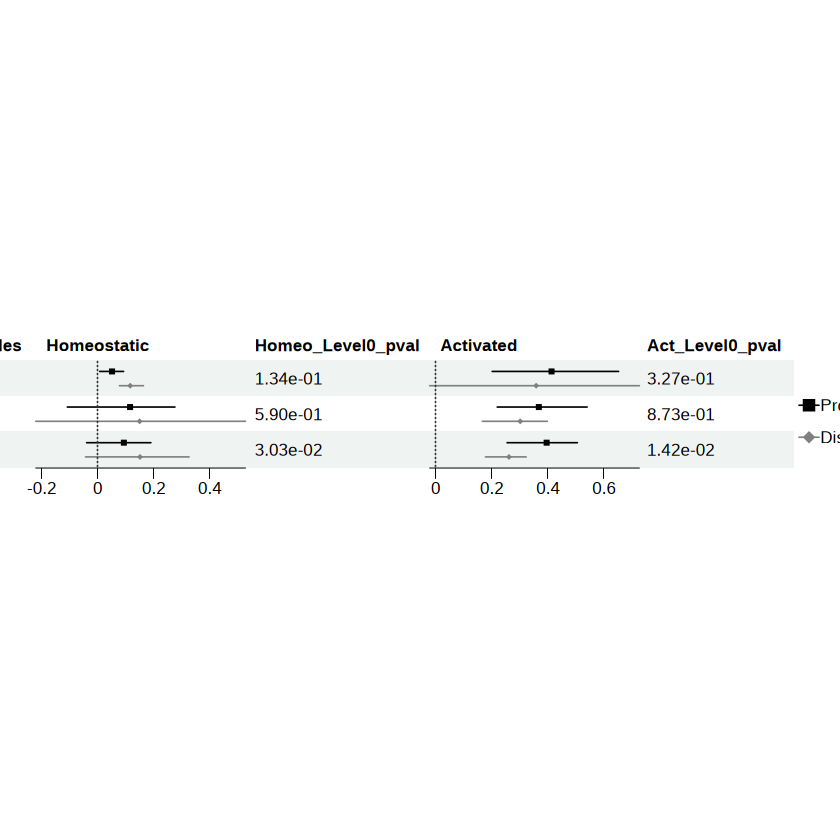

In [20]:
p <- forest(dt[,c(1,7,8,21,22)],
est = list(dt$Homeo_Level0_med,dt$Act_Level0_med,dt$Homeo_Other_med,dt$Act_Other_med),
lower = list(dt$Homeo_Level0_min,dt$Act_Level0_min,dt$Homeo_Other_min,dt$Act_Other_min),
upper = list(dt$Homeo_Level0_max,dt$Act_Level0_max,dt$Homeo_Other_max,dt$Act_Other_max),
            ci_column = c(2, 4),
          #  ref_line = 1,
           # vert_line = c(0.5, 2),
            nudge_y = 0.4,
            theme = tm)
ggsave(p,filename = "Ab_Forestplot_inSamples.pdf",height = 4, width = 10)
p